# Title

MRI Lesion Segmentation in Multiple Sclerosis Database

http://www.ehealthlab.cs.ucy.ac.cy/old/doc/Publications/Datasets/MRIFreeDataset.zip

# Description

Multiple sclerosis (MS) is the most common inflammatory demyelinating disease of the central nervous system. The disease can appear in multiple types, depending on the duration of the relapse and remitting stages. The initial point of the disease is Clinically Isolated Syndrome (CIS), that is up to 24 hours long. During the following progress, the demyelated regions (so-called lesions) are starting to appear in the brain white matter, causing interconnections between neurons to degrade. 

Multiple tests are used to diagnose MS precisely. Lesion detection and traction through Magnetic Resonanse Imaging (MRI) appears to be pretty sensitive and safe among these methods. The described dataset can be useful to estimate the future progress of the disease since the CIS stage based on MRI scans.

# Experiment

- 38 subjects with diagnosed CIS MS and 20 healthy subjects with different age, gender and degree of disability participated in the experiment.
- MRI was made since 0 month and 6-12 months after the CIS
- EDSS coefficients were estimated for each subject, and were reestimated for MS patients during the second procedure
- Lesions on MR images were segmented manually

### MRI device

Serial longitudinal transversed MR scans was made using a T2-weighted turbo spinecho pulse sequence (repetition time = 4408 ms, echo time = 100 ms, echo spacing = 10.8 ms). The reconstructed image had a slice thickness of 5 mm and a field of view of 230 mm with a pixel resolution of 2.226 pixels/mm. 

### Subjects

Thirty-eight patients (17 males, and 21 females), aged 34.1 ± 10.5 (mean age ± standard deviation), with a CIS of MS and MRI-detectable brain lesions were scanned twice at 1.5 T with an interval of 6-12 months. Additionally, the brains of 20 healthy, age-matched (mean ± SD: 30.8 ± 7.6) volunteers (8 males, and 12 females) were MRI-scanned to allow segmentation and analysis of normal brain white matter 

### File content
- 1887 MR images in TIFF or BMP format
- 1777 segmented lesions in .plq format. Each file contains lesion boundaries, cropped lesion image, related binary mask
- The data about healthy subjects, the EDSS and gender data are missing

# Related articles

[1] C.P. Loizou, V. Murray, M.S. Pattichis, I. Seimenis, M. Pantziaris, C.S. Pattichis, Multi-scale amplitude modulation-frequency modulation (AM-FM) texture analysis of multiple sclerosis in brain MRI images, IEEE Trans. Inform. Tech. Biomed., vol. 15, no. 1, pp. 119-129, 2011.   

[2] C.P. Loizou, E.C. Kyriacou, I. Seimenis, M. Pantziaris, S. Petroudi, M. Karaolis, C.S. Pattichis, Brain white matter lesion classification in multiple sclerosis subjects for the prognosis of future disability, Intelligent Decision Technologies Journal (IDT), vol. 7, pp. 3-10, 2013.

[3] C.P. Loizou, M. Pantziaris, C.S. Pattichis, I. Seimenis, Brain MRI Image normalization in texture analysis of multiple sclerosis, J. Biomed. Graph. & Comput., vol. 3, no.1, pp. 20-34, 2013. 

[4] C.P. Loizou, S. Petroudi, I. Seimenis, M. Pantziaris, C.S. Pattichis, Quantitative texture analysis of brain 
white matter lesions derived from T2-weighted MR images in MS patients with clinically isolated syndrome, J. Neuroradiol., acepted. 

# Exploration

As was mentioned above, the described dataset contains MRI images of 38 patients right after the onset and after 6-12 month. The common description of a lesion - cropped texture, its mask and position of borders on MRI scan - is presented on fig. 1.

![Age](./images/cropped.png)
![Age](./images/full.png)

<center>Figure 1. Description related to the MS lesion </center>

The dataset contains information about the patient age, it is presented on fig. 2. The age distribution is bimodal, i.e. there is a possible difference in a course of MS disease for younger and older patients. 

This dependency is shown on fig. 3. The average size of lesion regions tends to increase faster for older patients, at the same time the lesions tends to be more destructive for younger patients (i.e. the average intensity of lesions changes faster)

![](./images/age.png)

<center>Figure 2. The distribution of MS patients age before the first scan</center>

![Age](./images/dependency.png)

<center>Figure 3. The dependency between patient age and lesion parameters</center>

### Code

In [1]:
from scipy.io import loadmat

In [2]:
from PIL import Image

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [7]:
import os

In [8]:
patients_df = pd.read_excel("/home/noomkcalb/Документы/internship/datasets-review/tasks/multiple-sclerosis/Initial & repeat MRI in MS-Free Dataset/PatientCodes-Names.xls")

In [9]:
patients_df.drop(0, inplace=True)

In [12]:
patients_df.drop(columns=["Unnamed: 7", "Unnamed: 6"], inplace=True)

In [13]:
patients_df.head()

,N,Date Of bitrh,Date of Exam,Age at onset,EDSS,CODE
1,1.0,1970-01-05,2004-05-24,34.0,1.0,AT
2,2.0,1973-10-20,2003-11-12,30.0,1.0,AA
3,3.0,1953-05-15,2003-01-14,50.0,1.0,GPE
4,4.0,1981-03-29,2004-02-11,23.0,1.0,HC
5,5.0,1983-07-21,2004-07-21,21.0,1.0,IO


In [14]:
patients_df.columns

Index(['N', 'Date Of bitrh ', 'Date of Exam ', 'Age at onset ', 'EDSS',
       'CODE'],
      dtype='object')

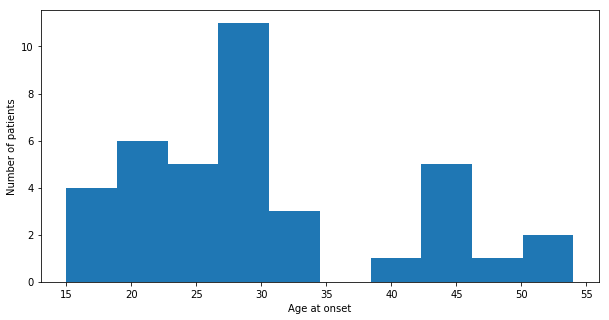

In [15]:
plt.figure(figsize=(10, 5))
patients_df["Age at onset "].plot(kind="hist")
plt.xlabel("Age at onset")
plt.ylabel("Number of patients")

In [16]:
patients_df["Date of Exam "] = pd.to_datetime(patients_df["Date of Exam "])

In [36]:
im = Image.open("./Initial & repeat MRI in MS-Free Dataset/CHEM/2/IM_00010.TIF")
lesion_scan = np.array(im)

In [37]:
lesion_data = loadmat("./Initial & repeat MRI in MS-Free Dataset/CHEM/2/IM_00010_1.plq")

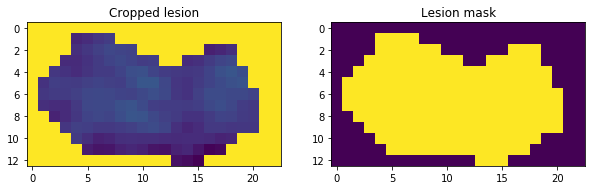

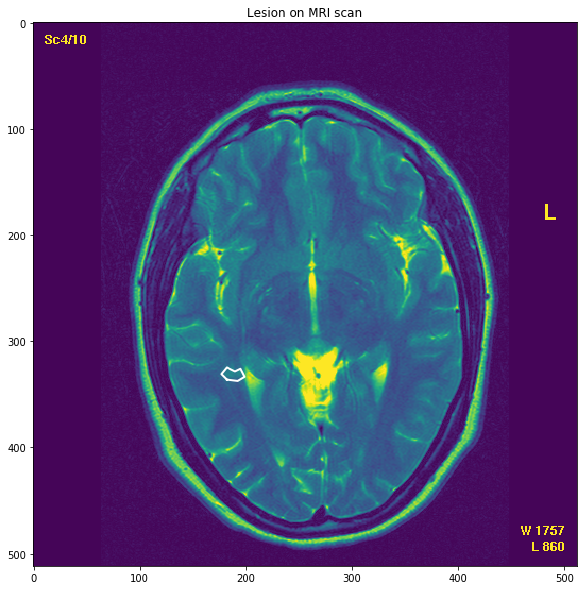

In [38]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(lesion_data["reg"])
plt.title("Cropped lesion")
plt.subplot(122)
plt.imshow(lesion_data["mask"])
plt.title("Lesion mask")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(lesion_scan)
plt.plot(lesion_data["xi"], lesion_data["yi"], color="white", linewidth=2)
plt.title("Lesion on MRI scan")
plt.show()

In [36]:
def process_plq(path):
    params = loadmat(path)
    return params["mask"].sum(), (params["reg"] * params["mask"]).mean() / 255

In [37]:
shapes = []
for root, dirs, files in os.walk("./Initial & repeat MRI in MS-Free Dataset/"):
    path = root.split(os.sep)
    for file in files:
        if ".plq" in file:
            _, _, patient, stage = root.split("/")
            path = root + "/" + file
            size, intensity = process_plq(path)
            shapes.append((size, intensity, patient, stage))

In [38]:
shapes_df = pd.DataFrame(shapes, columns=["size", "intensity", "patient", "stage"])

In [71]:
patient_progress_df = shapes_df.groupby(["stage", "patient"])[["intensity", "size"]].agg({
    "intensity": "mean",
    "size": ["count", "mean"]
}).reset_index()

In [72]:
patient_progress_df.columns = ["stage", "patient", "number", "size", "intensity"]

In [73]:
patient_progress_df = patient_progress_df[patient_progress_df["stage"] == "1"][["patient", "number", "intensity", "size"]].merge(
    patient_progress_df[patient_progress_df["stage"] == "2"][["patient", "number", "intensity", "size"]],
    how="left",
    on="patient",
    suffixes=("_initial", "_repeated")
)

In [74]:
patient_progress_df["size_change"] = patient_progress_df["size_repeated"] / patient_progress_df["size_initial"]
patient_progress_df["intensity_change"] = patient_progress_df["intensity_repeated"] / patient_progress_df["intensity_initial"]
patient_progress_df["number_change"] = patient_progress_df["number_repeated"] / patient_progress_df["number_initial"]

In [75]:
patient_progress_df.sort_values("intensity_change", ascending=False).head()

,patient,number_initial,intensity_initial,size_initial,number_repeated,intensity_repeated,size_repeated,size_change,intensity_change,number_change
7,DK,5,0.052495,266.000000,6,0.209251,94.166667,0.354010,3.986145,1.200000
31,SP,8,0.146347,249.000000,13,0.281499,223.461538,0.897436,1.923505,1.625000
5,CK,26,0.124341,132.807692,39,0.235026,106.256410,0.800077,1.890171,1.500000
4,CHP,19,0.157853,30.368421,22,0.212683,29.181818,0.960926,1.347349,1.157895
13,IG,64,0.183532,34.359375,53,0.234313,38.981132,1.134512,1.276685,0.828125


In [76]:
patient_progress_df.drop(37, inplace=True)

In [77]:
patient_progress_df = patient_progress_df.merge(patients_df, left_on="patient", right_on="CODE")

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


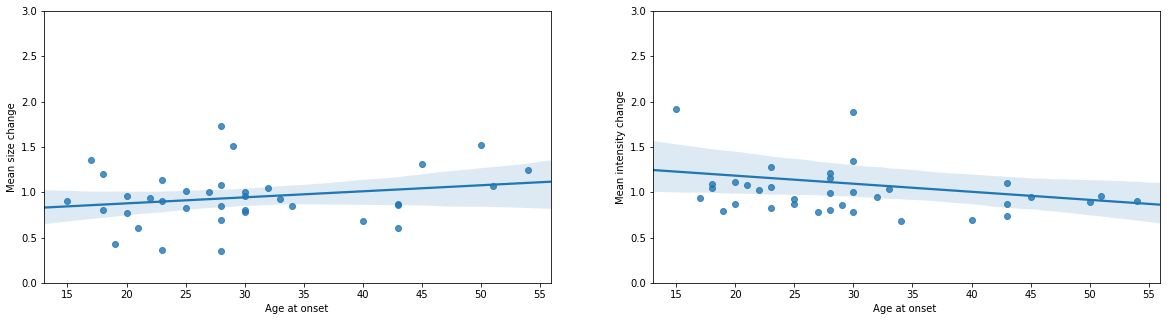

In [82]:
plt.figure(figsize=(20, 5))
# plt.title("Dependency between age and a course of a disease")
plt.subplot(121)
sns.regplot(patient_progress_df["Age at onset "], patient_progress_df["size_change"])
plt.ylim(0, 3)
plt.ylabel("Mean size change")

plt.subplot(122)
sns.regplot(patient_progress_df["Age at onset "], patient_progress_df["intensity_change"])
plt.ylim(0, 3)
plt.ylabel("Mean intensity change")